# Hopper Puzzle

While looking for jobs, I came across a secret data set on the application page and decided to take a look. 

## Read in libraries and data

First, I'll read in the data and libraries that I will need to do my analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('puzzle.csv', header=None)
df.columns = ['A', 'B']
df.head()

,A,B
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


In [28]:
df.shape

(1024, 2)

At first glance and having worked with a similar dataset and based on what I know about the company, I believe that these are longitude and latitude pairs, let's get more information on the numbers. Then, let's do some exploratory data analysis. 

In [3]:
df.describe()

,A,B
count,1024.000000,1024.000000
mean,0.504729,-0.388165
std,0.355107,1.499346
min,-0.925070,-2.837888
25%,0.389721,-1.559228
50%,0.591392,-1.129903
75%,0.746583,0.578621
max,1.195399,3.096964


Based on the range of the data, the latitude and the longitude seems to be represented in radians instead of degrees. I'll first do some exploratory data analysis before confirming this and converting the numbers. 

## Exploratory Data Analysis

Because I have an inkling that this dataset might be latitude and longitude values, I'll do a scatterplot to see if I'm right.

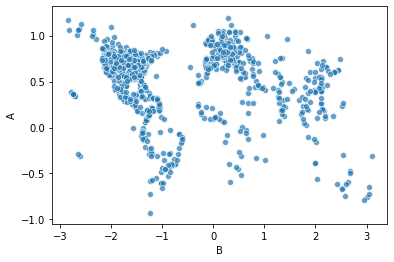

In [4]:
sns.scatterplot(x='B', y='A', data=df, alpha=.7)

Looks like my hypothesis was correct! Now that we know that the data is latitude and longitude values in radians, I will rename the columns then convert the values from radians to degrees.

In [5]:
df.rename(columns = {'A':'Latitude', 'B':'Longitude'}, inplace=True)

In [6]:
# import math library to convert radians into degrees
import math

# convert using formula
def rad_to_deg(radians):
    return(radians*180/math.pi)

In [7]:
df['Latitude'] = df['Latitude'].apply(rad_to_deg)
df['Longitude'] = df['Longitude'].apply(rad_to_deg)

Next, I will first remove duplicates by creating a new dataframe.

In [8]:
df2 = df.drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')

In [9]:
df2.head()

,Latitude,Longitude
0,22.755002,121.101998
8,55.437196,-5.686388
9,3.543223,-76.381600
10,41.248103,-8.681388
11,43.512902,43.636603


Now I'm ready to plot! 

To plot, I will use basemap.

In [10]:
from mpl_toolkits.basemap import Basemap

/Users/amyksu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/amyksu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


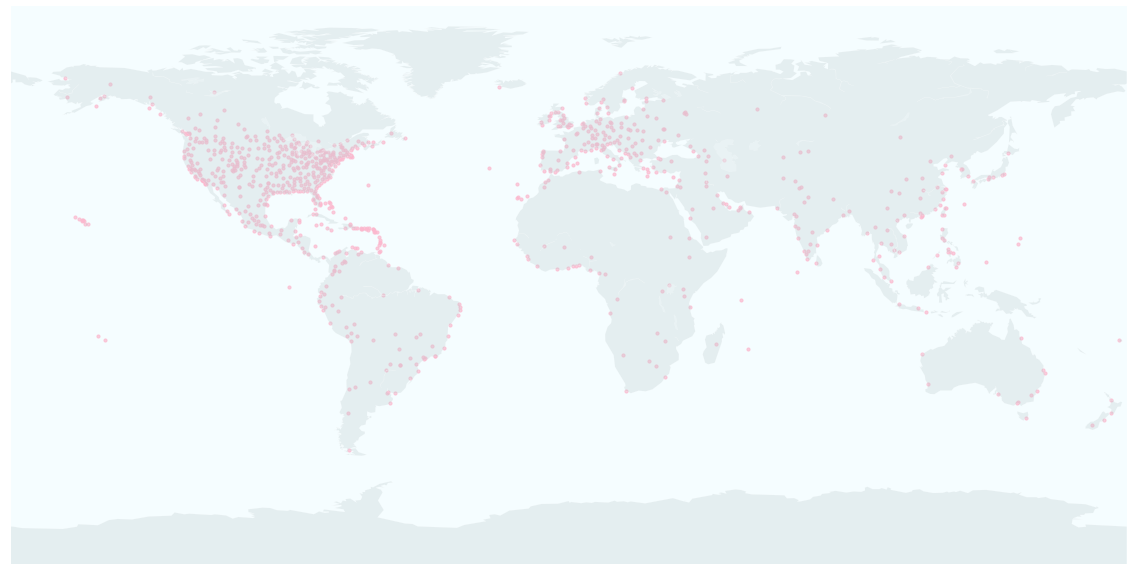

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
earth = Basemap(ax=ax, projection='cyl')
earth.drawmapboundary(fill_color='#f5fdff', linewidth=0)
earth.fillcontinents(color='#becccf', alpha=0.3)
earth.drawcoastlines(linewidth=0.1, color="white")

ax.scatter(df2['Longitude'], df2['Latitude'],c='#FCB8CE', alpha=0.7, s=10)


In addition to plotting this with Basemap, I also plotted it with Tableau because it's a little neater:

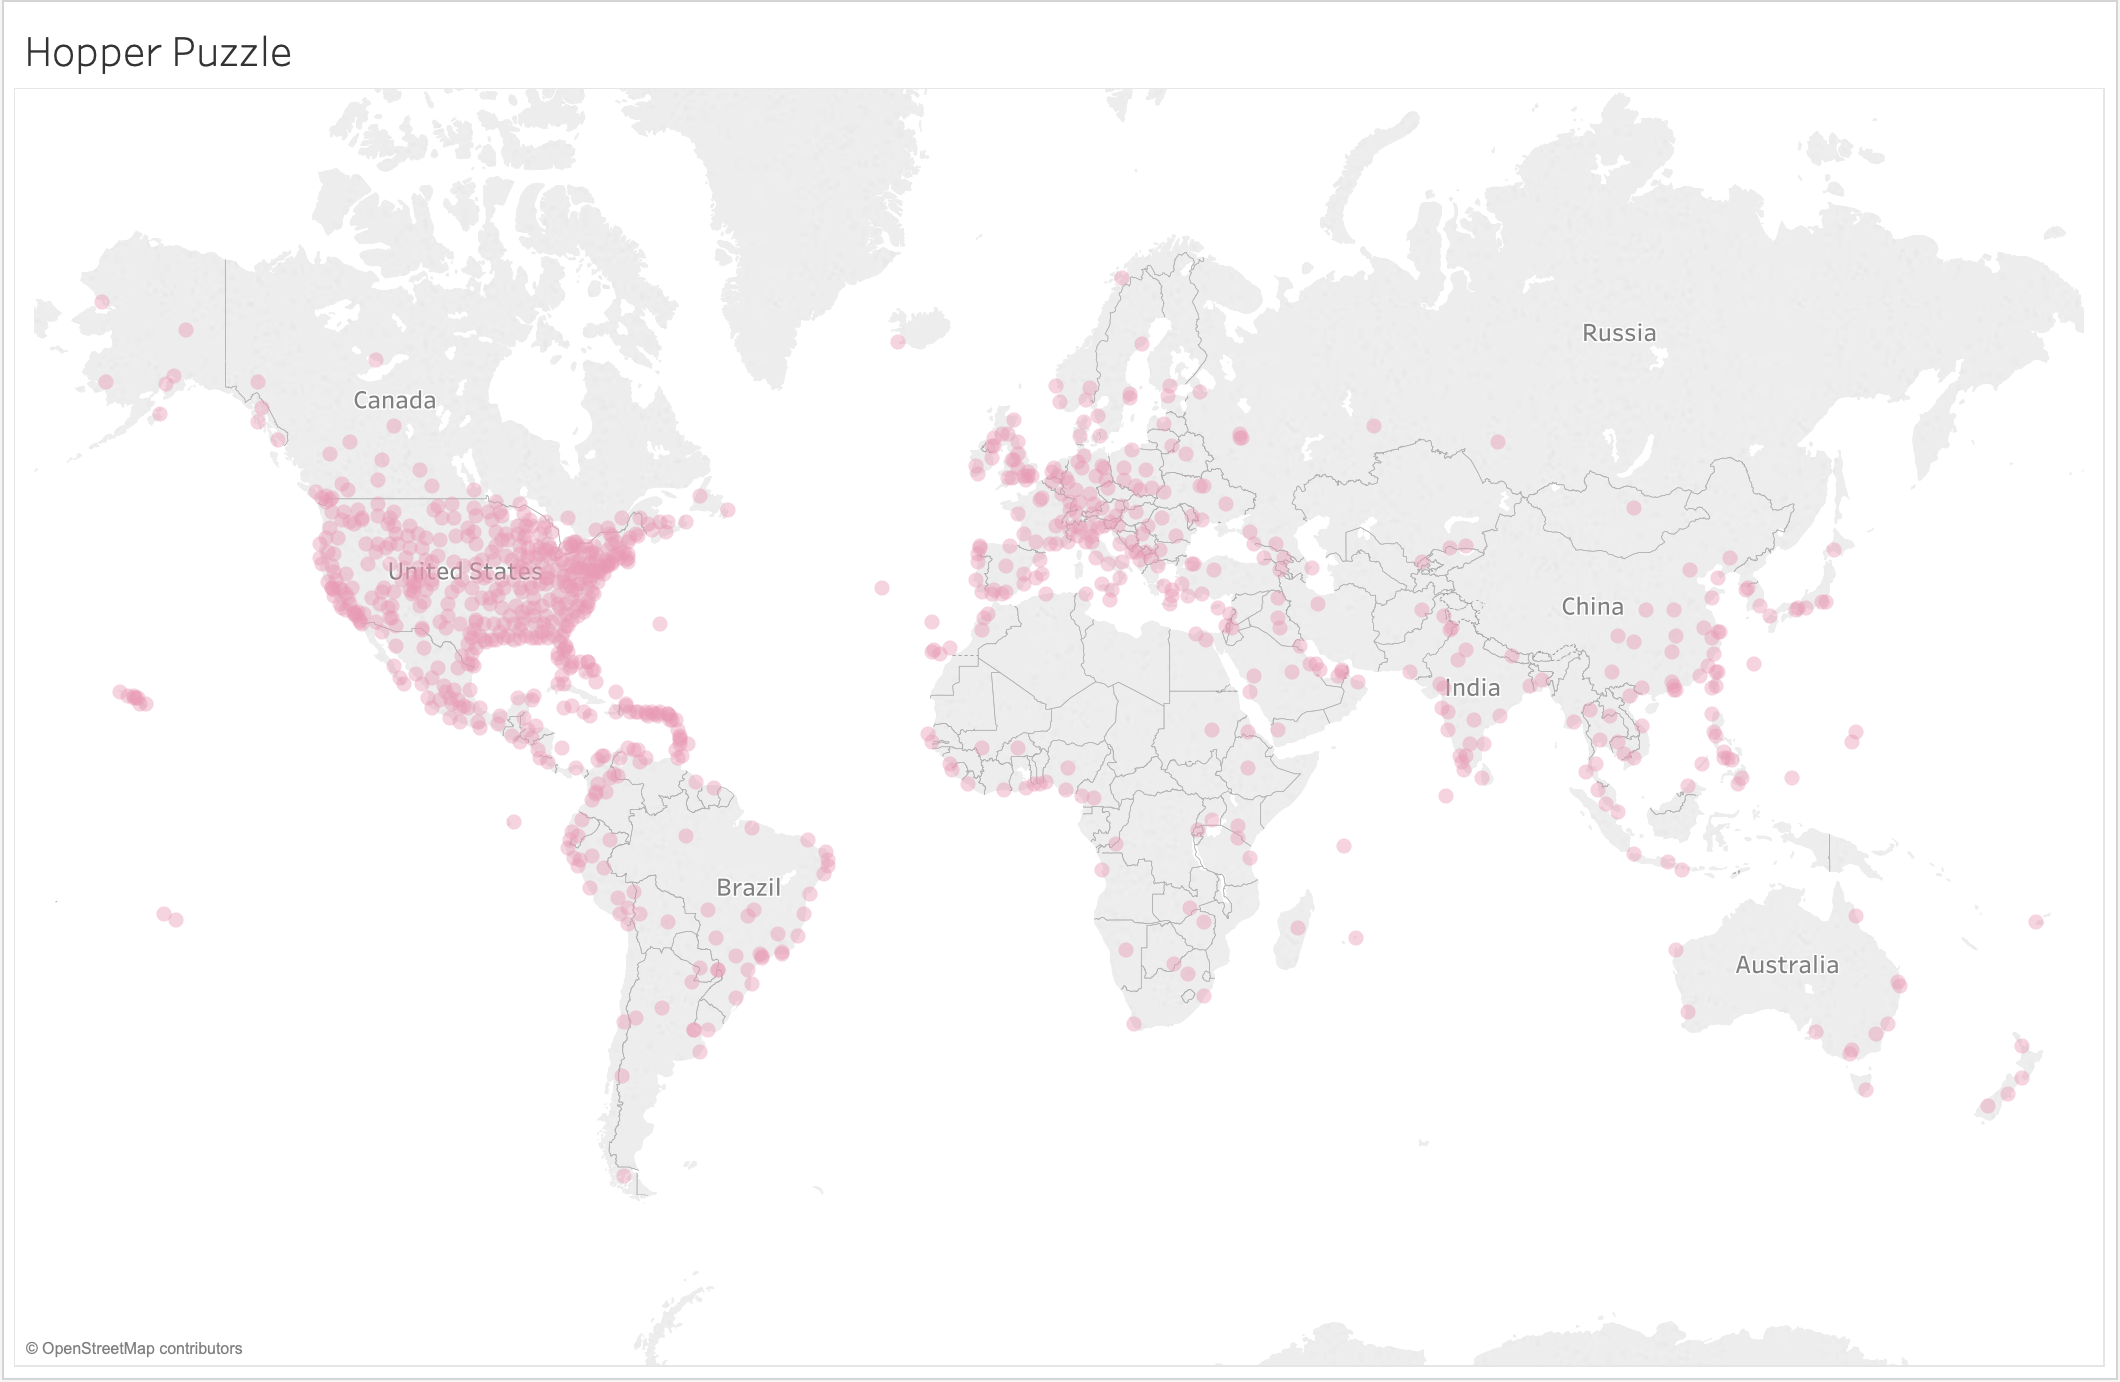

Looking at the map and having previously worked with the Bureau of Transportation Statistics flight delays dataset, it appears to me that based on the portion of the United States that this dataset lists the latitude and longitude pairs of airports. 

With this hypothesis in mind, I found a dataset (from openflights.org) of all of the latitude and longitude pairs of airports globally. Using this, I will match the dataset found on the Hopper job description to the airport dataset to see if the pairs match. 

In [12]:
airports = pd.read_csv('airports.csv')
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


I don't need all of the columns, so I will just keep the ones I need.

In [13]:
airports = airports[['latitude_deg','longitude_deg','ident','type','name', 'iso_country']]

In [14]:
airports.head()

,latitude_deg,longitude_deg,ident,type,name,iso_country
0,40.070801,-74.933601,00A,heliport,Total Rf Heliport,US
1,38.704022,-101.473911,00AA,small_airport,Aero B Ranch Airport,US
2,59.949200,-151.695999,00AK,small_airport,Lowell Field,US
3,34.864799,-86.770302,00AL,small_airport,Epps Airpark,US
4,35.608700,-91.254898,00AR,closed,Newport Hospital & Clinic Heliport,US


Now let's map the airports from the airport dataset to the dataset that was provided by Hopper. 

First, I will do it the easy way by rounding to the fourth decimal point.

In [43]:
airports['latitude_deg'] = round(airports['latitude_deg'],3)
airports['longitude_deg'] = round(airports['longitude_deg'],3)

In [44]:
airports.head()

,latitude_deg,longitude_deg,ident,type,name,iso_country
0,40.071,-74.934,00A,heliport,Total Rf Heliport,US
1,38.704,-101.474,00AA,small_airport,Aero B Ranch Airport,US
2,59.949,-151.696,00AK,small_airport,Lowell Field,US
3,34.865,-86.770,00AL,small_airport,Epps Airpark,US
4,35.609,-91.255,00AR,closed,Newport Hospital & Clinic Heliport,US


In [46]:
df['latitude_deg'] = round(df['latitude_deg'],3)
df['longitude_deg'] = round(df['longitude_deg'],3)

In [18]:
df.rename(columns = {'Latitude':'latitude_deg', 'Longitude':'longitude_deg'}, inplace=True)

In [19]:
df.head()

,latitude_deg,longitude_deg
0,22.755,121.102
1,22.755,121.102
2,22.755,121.102
3,22.755,121.102
4,22.755,121.102


Now I will perform a left join to match the airports to the original dataset.

In [47]:
final_df = pd.merge(df, airports, how='left', 
                    left_on=['latitude_deg', 'longitude_deg'], 
                    right_on=['latitude_deg', 'longitude_deg'])
final_df.head(20)


,latitude_deg,longitude_deg,ident,type,name,iso_country
0,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
1,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
2,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
3,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
4,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
5,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
6,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
7,22.755,121.102,RCFN,medium_airport,Taitung Airport,TW
8,55.437,-5.686,EGEC,medium_airport,Campbeltown Airport,GB
9,3.543,-76.382,SKCL,medium_airport,Alfonso Bonilla Aragon International Airport,CO


Looks pretty good! Let's see if it really worked and if there are any NaNs. 

In [49]:
final_df.isna().sum()

latitude_deg      0
longitude_deg     0
ident            18
type             18
name             18
iso_country      19
dtype: int64

In [52]:
final_df[final_df['ident'].isna()]

,latitude_deg,longitude_deg,ident,type,name,iso_country
41,7.368,134.544,NaN,NaN,NaN,NaN
148,21.319,-157.922,NaN,NaN,NaN,NaN
246,40.494,-3.567,NaN,NaN,NaN,NaN
247,50.026,8.543,NaN,NaN,NaN,NaN
254,41.804,12.251,NaN,NaN,NaN,NaN
297,30.342,-85.797,NaN,NaN,NaN,NaN
356,48.725,2.359,NaN,NaN,NaN,NaN
380,47.437,19.256,NaN,NaN,NaN,NaN
463,44.572,26.102,NaN,NaN,NaN,NaN
479,10.603,-66.991,NaN,NaN,NaN,NaN


There's 18 NaN's so let's try the harder way, using the Haversine formula. The Haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Sounds like the perfect technique for our problem! 

First, I will define the distance formula. 

In [25]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

Then, I will create another function that will find the closest airport for each pair in the dataset.

In [26]:
def closest(airport, location):
    
    mapping_dict = []

    for x in range(len(airport)):
        ap = {'orig_lat': location['Latitude'], 
        'orig_long': location['Longitude'],
        'nearest_airport': airport.ident[x],
        'ap_name': airport.name[p],
        'ap_country': airport.iso_country[p],
        'ap_latitude': airport.latitude_deg[p],
        'ap_longitude': airport.longitude_deg[p],
        'distance': haversine(location['Latitude'],location['Longitude'],airport.latitude_deg[p],airport.longitude_deg[p])
        }

        mapping_dict.append(ap)
        
    dict_sorted = sorted(mapping_dict, key=lambda k: k['distance'])
    
    return dict_sorted[0]

Because this takes so long, I ran the code in my terminal.

## Insights

Now that we have mapped out the airports, let's see if we can get any insights from the data.

In [31]:
final_df.name.value_counts()

Taitung Airport                                         101
OR Tambo International Airport                            2
Melbourne International Airport                           2
Alfonso Bonilla Aragon International Airport              2
Ted Stevens Anchorage International Airport               2
Francisco de Sá Carneiro Airport                          2
Sofia Airport                                             2
Pinto Martins International Airport                       2
Atatürk International Airport                             2
Learmonth Airport                                         2
Palma De Mallorca Airport                                 2
Naples International Airport                              2
Tri-Cities Regional TN/VA Airport                         2
Southend Airport                                          2
Düsseldorf Airport                                        2
Will Rogers World Airport                                 1
Sydney Kingsford Smith International Air

What's weird is that Taitung Airport in Taiwan appears 101 times, while every other airport only appears once or twice. I'm guessing that this could possibly be flights going in or out of the airport. Let's see if I can support this hypothesis once again through a visualization.

First, I will take a look at the shape of the original data, split the data into half, the first column will be departure and the second will be arrivals. Then, I will combine the two back together with the airport information merged and finally, visualize this pattern and see if it makes sense.

In [29]:
df.shape

(1024, 2)

In [65]:
origin_df = df.iloc[0:512]
origin_df.rename(columns = {'latitude_deg':'origin_latitude', 'longitude_deg':'origin_longitude'}, inplace=True)
origin_df.tail()

,origin_latitude,origin_longitude
507,35.337,-94.367
508,18.008,-66.563
509,36.675,-4.499
510,18.135,-65.494
511,40.899,29.309


In [66]:
dest_df = df.iloc[512:]
dest_df.rename(columns = {'latitude_deg':'dest_latitude', 'longitude_deg':'dest_longitude'}, inplace=True)
dest_df.head()

,dest_latitude,dest_longitude
512,8.113,98.317
513,25.907,-97.426
514,52.171,-106.700
515,52.454,-1.748
516,58.355,-134.576


In [67]:
len(origin_df)

512

In [68]:
len(dest_df)

512

Now that we have successfully split the original data, let's join them. Then, I will add the names of the airports plus some other information. 

In [70]:
origin_df.reset_index(drop=True, inplace=True)
dest_df.reset_index(drop=True, inplace=True)

In [71]:
origin_df = pd.concat([origin_df, dest_df], axis=1)
origin_df.head()

,origin_latitude,origin_longitude,dest_latitude,dest_longitude
0,22.755,121.102,8.113,98.317
1,22.755,121.102,25.907,-97.426
2,22.755,121.102,52.171,-106.700
3,22.755,121.102,52.454,-1.748
4,22.755,121.102,58.355,-134.576


In [80]:
origin_airports = airports.copy()
dest_airports = airports.copy()

origin_airports.rename(columns={'latitude_deg':'origin_latitude'
                                ,'longitude_deg':'origin_longitude'}
                       , inplace=True)

dest_airports.rename(columns={'latitude_deg':'dest_latitude'
                                ,'longitude_deg':'dest_longitude'}
                     , inplace=True)

In [83]:
origin_df = pd.merge(origin_df, origin_airports, on=['origin_latitude','origin_longitude'], how='left')
origin_df = pd.merge(origin_df, dest_airports, on=['dest_latitude','dest_longitude'], how='left')


In [84]:
origin_df

,origin_latitude,origin_longitude,dest_latitude,dest_longitude,ident_x,type_x,name_x,iso_country_x,ident_y,type_y,name_y,iso_country_y,ident,type,name,iso_country
0,22.755,121.102,8.113,98.317,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,VTSP,large_airport,Phuket International Airport,TH
1,22.755,121.102,25.907,-97.426,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,KBRO,medium_airport,Brownsville South Padre Island International A...,US
2,22.755,121.102,52.171,-106.700,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,CYXE,medium_airport,Saskatoon John G. Diefenbaker International Ai...,CA
3,22.755,121.102,52.454,-1.748,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,EGBB,large_airport,Birmingham International Airport,GB
4,22.755,121.102,58.355,-134.576,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,PAJN,medium_airport,Juneau International Airport,US
5,22.755,121.102,35.617,-106.089,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,KSAF,medium_airport,Santa Fe Municipal Airport,US
6,22.755,121.102,12.189,-68.960,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,TNCC,medium_airport,Hato International Airport,CW
7,22.755,121.102,48.647,-123.426,RCFN,medium_airport,Taitung Airport,TW,RCFN,medium_airport,Taitung Airport,TW,CYYJ,large_airport,Victoria International Airport,CA
8,55.437,-5.686,32.657,-114.606,EGEC,medium_airport,Campbeltown Airport,GB,EGEC,medium_airport,Campbeltown Airport,GB,KNYL,medium_airport,Yuma MCAS/Yuma International Airport,US
9,3.543,-76.382,37.327,-79.200,SKCL,medium_airport,Alfonso Bonilla Aragon International Airport,CO,SKCL,medium_airport,Alfonso Bonilla Aragon International Airport,CO,KLYH,medium_airport,Lynchburg Regional Preston Glenn Field,US


In [85]:
origin_df.isna().sum()

origin_latitude      0
origin_longitude     0
dest_latitude        0
dest_longitude       0
ident_x             10
type_x              10
name_x              10
iso_country_x       10
ident_y             10
type_y              10
name_y              10
iso_country_y       10
ident                8
type                 8
name                 8
iso_country          9
dtype: int64

In [99]:
origin_df.dropna(inplace=True)

In [100]:
origin_df.columns

Index(['origin_latitude', 'origin_longitude', 'dest_latitude',
       'dest_longitude', 'ident_x', 'type_x', 'origin_airport',
       'iso_country_x', 'ident', 'type', 'dest_airport', 'iso_country',
       'route', 'flight_count'],
      dtype='object')

In [87]:
origin_df.drop(['ident_y', 'type_y', 'name_y', 'iso_country_y'], axis=1, inplace=True)

In [88]:
origin_df['route'] = origin_df['ident_x'] + "-" + origin_df['ident']

In [89]:
origin_df.head()

,origin_latitude,origin_longitude,dest_latitude,dest_longitude,ident_x,type_x,name_x,iso_country_x,ident,type,name,iso_country,route
0,22.755,121.102,8.113,98.317,RCFN,medium_airport,Taitung Airport,TW,VTSP,large_airport,Phuket International Airport,TH,RCFN-VTSP
1,22.755,121.102,25.907,-97.426,RCFN,medium_airport,Taitung Airport,TW,KBRO,medium_airport,Brownsville South Padre Island International A...,US,RCFN-KBRO
2,22.755,121.102,52.171,-106.700,RCFN,medium_airport,Taitung Airport,TW,CYXE,medium_airport,Saskatoon John G. Diefenbaker International Ai...,CA,RCFN-CYXE
3,22.755,121.102,52.454,-1.748,RCFN,medium_airport,Taitung Airport,TW,EGBB,large_airport,Birmingham International Airport,GB,RCFN-EGBB
4,22.755,121.102,58.355,-134.576,RCFN,medium_airport,Taitung Airport,TW,PAJN,medium_airport,Juneau International Airport,US,RCFN-PAJN


In [93]:
origin_df.rename(columns={'name_x':'origin_airport', 'name':'dest_airport'}, inplace=True)

In [97]:
origin_df['flight_count']=origin_df.groupby(['origin_airport']).transform('count')

In [101]:
origin_df.head()

,origin_latitude,origin_longitude,dest_latitude,dest_longitude,ident_x,type_x,origin_airport,iso_country_x,ident,type,dest_airport,iso_country,route,flight_count
0,22.755,121.102,8.113,98.317,RCFN,medium_airport,Taitung Airport,TW,VTSP,large_airport,Phuket International Airport,TH,RCFN-VTSP,101.0
1,22.755,121.102,25.907,-97.426,RCFN,medium_airport,Taitung Airport,TW,KBRO,medium_airport,Brownsville South Padre Island International A...,US,RCFN-KBRO,101.0
2,22.755,121.102,52.171,-106.700,RCFN,medium_airport,Taitung Airport,TW,CYXE,medium_airport,Saskatoon John G. Diefenbaker International Ai...,CA,RCFN-CYXE,101.0
3,22.755,121.102,52.454,-1.748,RCFN,medium_airport,Taitung Airport,TW,EGBB,large_airport,Birmingham International Airport,GB,RCFN-EGBB,101.0
4,22.755,121.102,58.355,-134.576,RCFN,medium_airport,Taitung Airport,TW,PAJN,medium_airport,Juneau International Airport,US,RCFN-PAJN,101.0


In [102]:
origin_df.to_csv('routes.csv')

To graph the flight paths, I used Tabeleau and here are our final results.

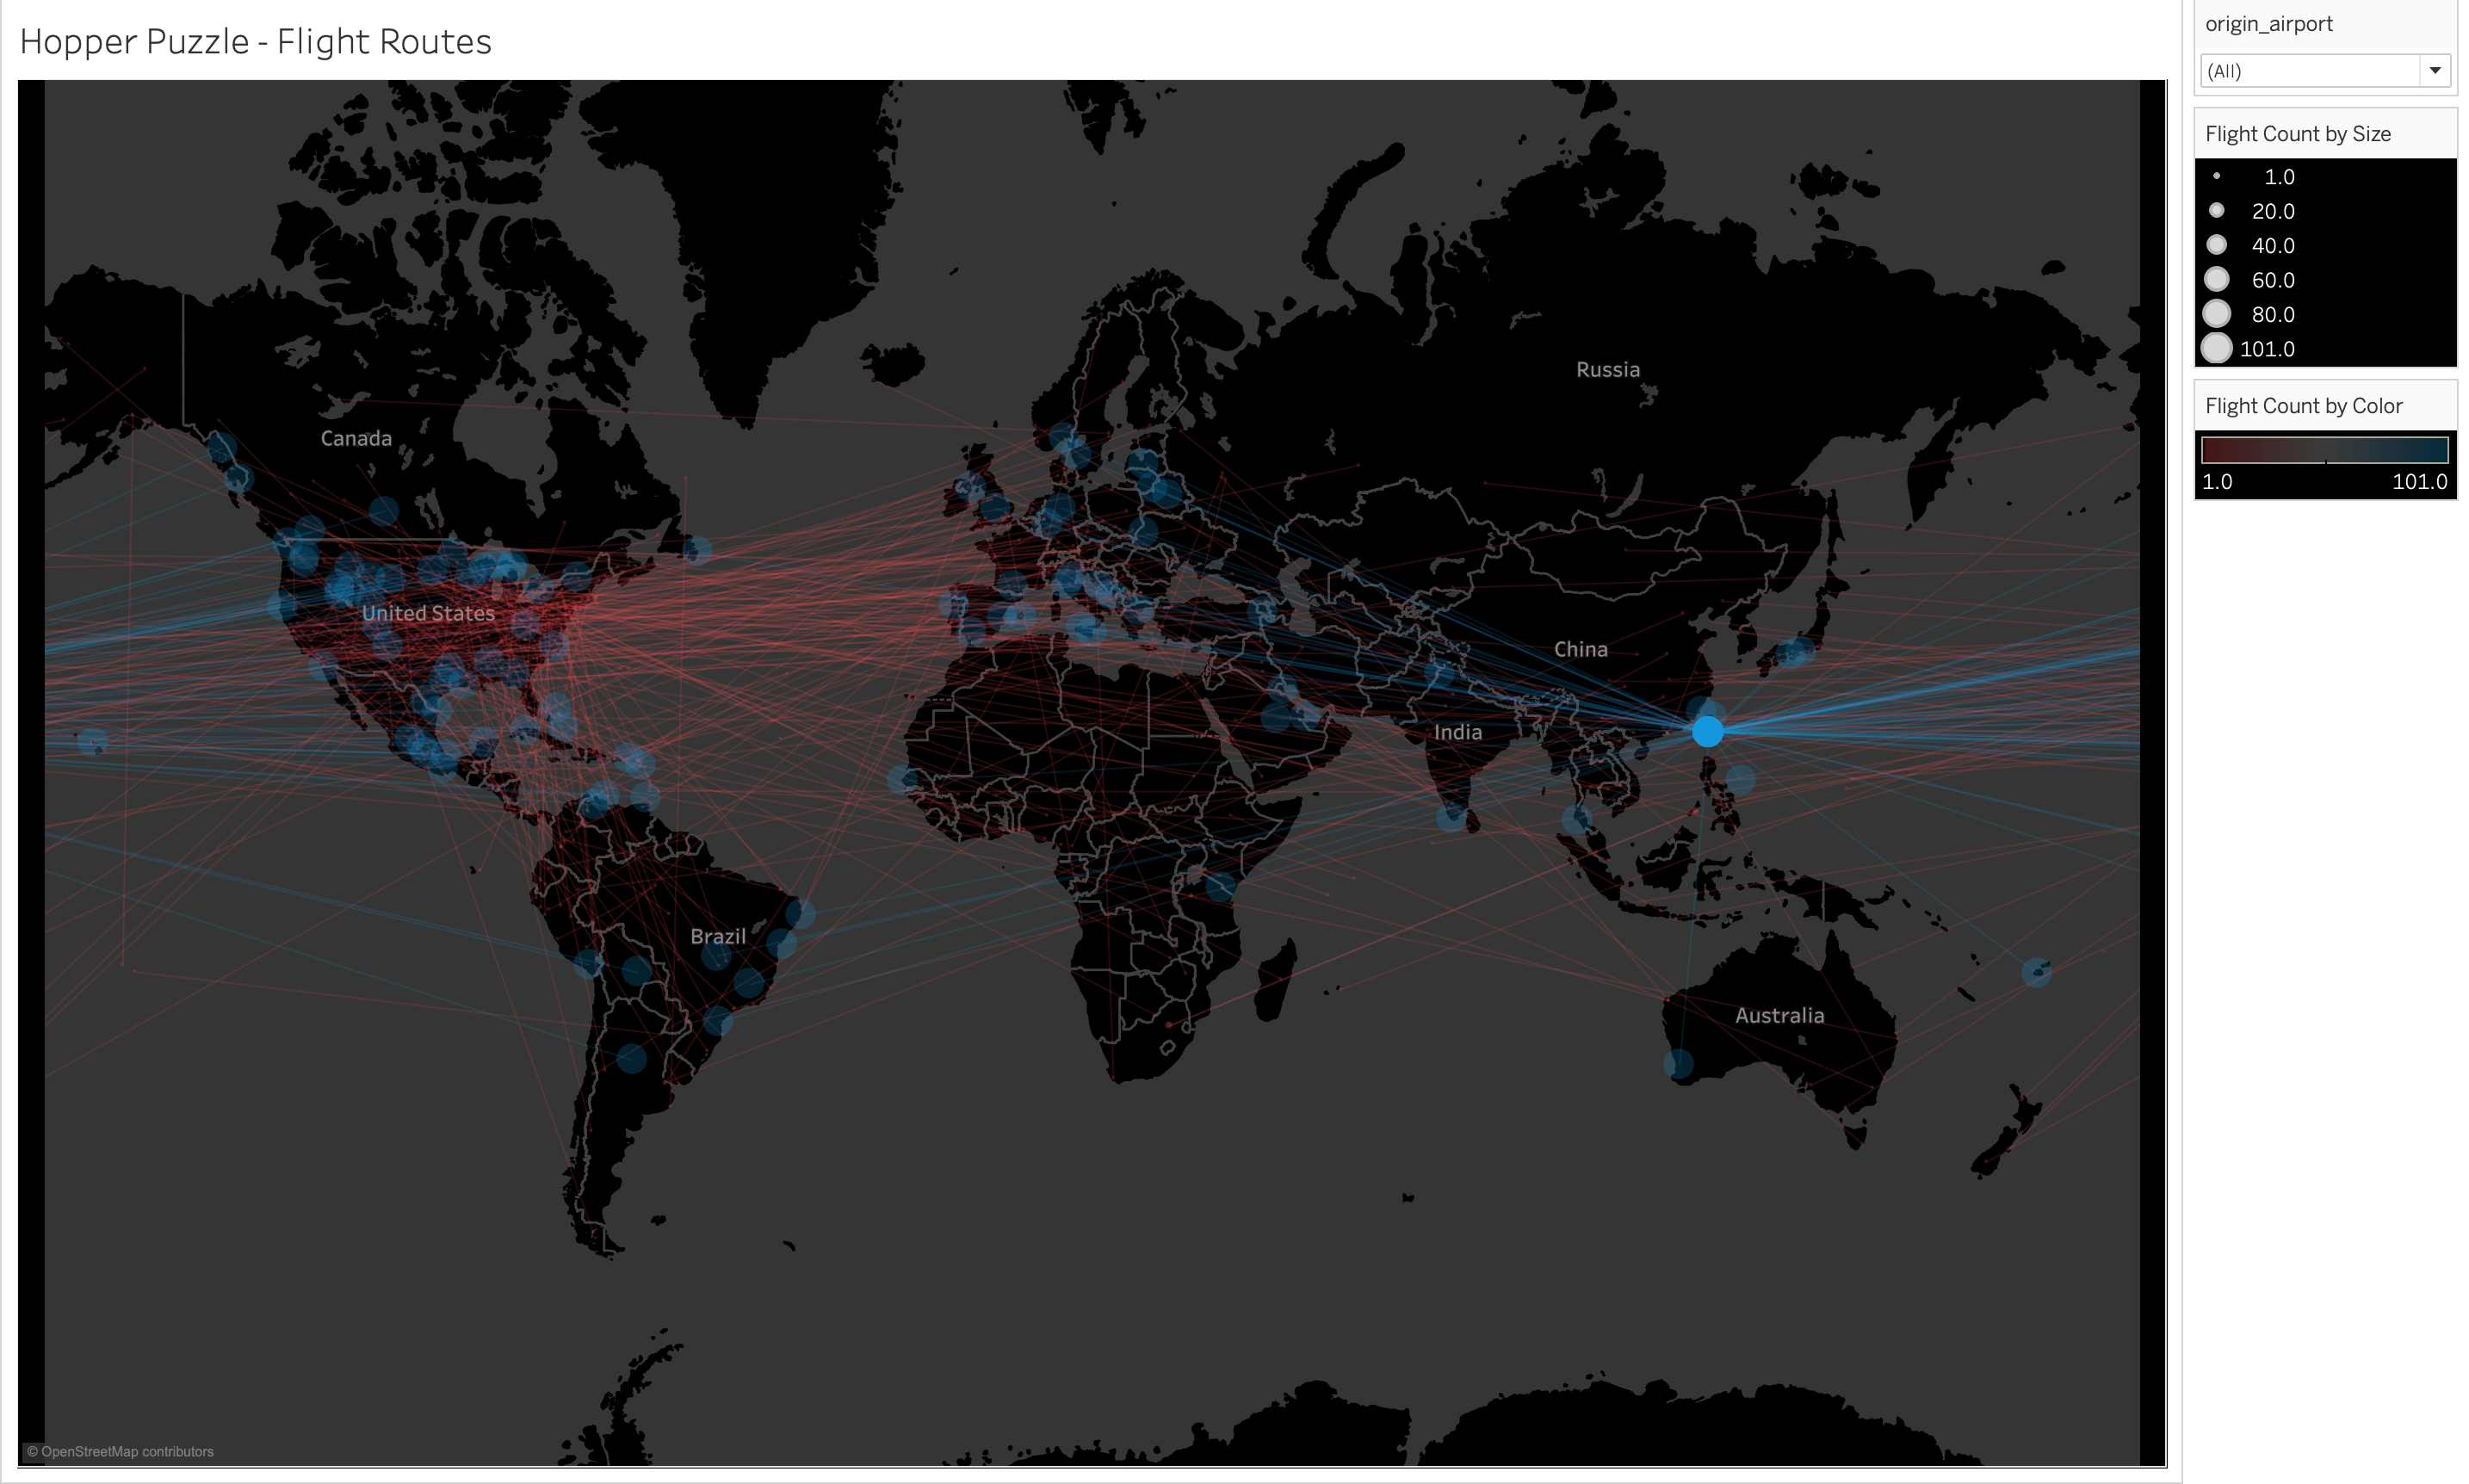

Like I mentioned, I believe this dataset shows flight paths. Contrary to my initial hypothesis that the dataset is solely of flights going in and out of Taitung airport, the dataset includes flights going in and out of other airports as well. In my plot above, the larger blue bubbles and lines indicates more flights going in and, or out of that airport. The smaller coral bubbles and lines indicates less flights. 